In [3]:
#MEDICAL IMAGE CLASSIFICATION: IMPORT
import numpy as np # forlinear algebra
import matplotlib.pyplot as plt #for plotting things
import os
from PIL import Image # for reading images
# Keras Libraries <- CNN
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Input, BatchNormalization, Concatenate, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

In [4]:
mainDIR = os.listdir('./chest_xray')
print(mainDIR)
train_folder= './chest_xray/train/'
val_folder = './chest_xray/val/'
test_folder = './chest_xray/test/'
# train
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'
#Normal pic
print(len(os.listdir(train_n)))
rand_norm= np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('normal picture title: ',norm_pic)
norm_pic_address = train_n+norm_pic
#Pneumonia
rand_p = np.random.randint(0,len(os.listdir(train_p)))
sic_pic = os.listdir(train_p)[rand_norm]
sic_address = train_p+sic_pic
print('pneumonia picture title:', sic_pic)

['__MACOSX', 'train', 'chest_xray', 'val', 'test']
1341
normal picture title:  NORMAL2-IM-1376-0001.jpeg
pneumonia picture title: person333_bacteria_1539.jpeg


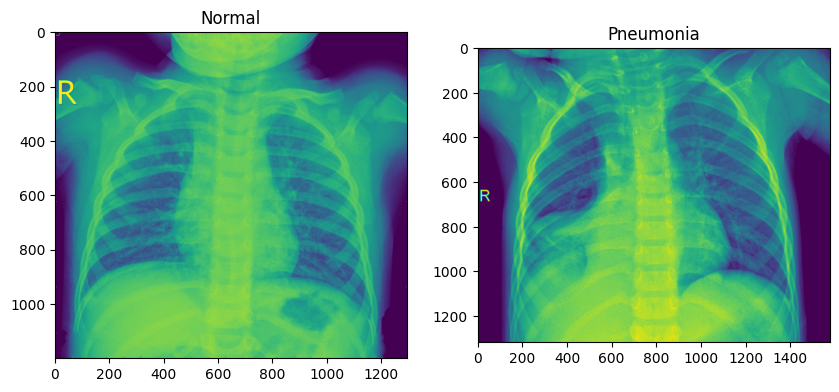

In [5]:
# Load the images
norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)
#Let's plt these images
f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')
a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sic_load)
a2.set_title('Pneumonia')
plt.show()

In [15]:
# 입력 레이어 정의
model_in = Input(shape=(64, 64, 3))
# 첫 번째 Conv2D 레이어
conv1 = Conv2D(32, (3, 3), activation='relu')(model_in)
# 첫 번째 MaxPooling2D 레이어
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
# 두 번째 Conv2D 레이어
conv2 = Conv2D(32, (3, 3), activation='relu')(pool1)
# 두 번째 MaxPooling2D 레이어
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
# Flatten 레이어
flat = Flatten()(pool2)
#첫 번째 Dense 레이어
dense1 = Dense(128, activation='relu')(flat)
# 두 번째 Dense 레이어
output = Dense(1, activation='sigmoid')(dense1)
# 모델 정의
model_fin = Model(inputs=model_in, outputs=output)
# 모델 컴파일
model_fin.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# 모델 요약 출력
model_fin.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 813,217 (3.10 MB)

 Trainable params: 813,217 (3.10 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
num_of_test_samples = 600
batch_size = 32
# Fitting the CNN to the images
# The function ImageDataGenerator augments your image by iterating through image as your CNN is getting ready to process that image
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255) #Image normalization.

training_set = train_datagen.flow_from_directory('./chest_xray/train', target_size = (64, 64), batch_size = 32, class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory('./chest_xray/val/', target_size=(64, 64), batch_size=32, class_mode='binary')

test_set = test_datagen.flow_from_directory('./chest_xray/test', target_size = (64, 64), batch_size =32, class_mode = 'binary')
model_fin.summary()


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 813,217 (3.10 MB)

 Trainable params: 813,217 (3.10 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
cnn_model = model_fin.fit(training_set, steps_per_epoch = 163, epochs = 10, validation_data = validation_generator, validation_steps = 624)
test_accu = model_fin.evaluate(test_set,steps=624)
model_fin.save('medical_ann.h5')
print('The testing accuracy is :',test_accu[1]*100, '%')
Y_pred = model_fin.predict(test_set, 100)
y_pred = np.argmax(Y_pred, axis=1)
max(y_pred)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 24s 138ms/step - accuracy: 0.7810 - loss: 0.4914 - val_accuracy: 0.8750 - val_loss: 0.3111
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8750 - val_loss: 0.3111
Epoch 3/10


2024-05-29 16:37:25.133562: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-29 16:37:25.143026: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-29 16:37:25.238087: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


163/163 ━━━━━━━━━━━━━━━━━━━━ 23s 136ms/step - accuracy: 0.9014 - loss: 0.2375 - val_accuracy: 0.7500 - val_loss: 0.3913
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 0.3913
Epoch 5/10


2024-05-29 16:37:48.472993: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-29 16:37:48.479003: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-29 16:37:48.569315: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


163/163 ━━━━━━━━━━━━━━━━━━━━ 23s 135ms/step - accuracy: 0.9174 - loss: 0.2065 - val_accuracy: 0.9375 - val_loss: 0.2551
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9375 - val_loss: 0.2551
Epoch 7/10


2024-05-29 16:38:11.557002: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-29 16:38:11.563550: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-29 16:38:11.655915: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


163/163 ━━━━━━━━━━━━━━━━━━━━ 24s 143ms/step - accuracy: 0.9299 - loss: 0.1807 - val_accuracy: 0.6250 - val_loss: 0.8501
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6250 - val_loss: 0.8501
Epoch 9/10


2024-05-29 16:38:35.890040: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-29 16:38:35.896156: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-29 16:38:35.982757: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


163/163 ━━━━━━━━━━━━━━━━━━━━ 23s 138ms/step - accuracy: 0.9211 - loss: 0.1983 - val_accuracy: 0.8750 - val_loss: 0.2782
Epoch 10/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8750 - val_loss: 0.2782


2024-05-29 16:38:59.471491: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-29 16:38:59.478174: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-29 16:38:59.561176: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


624/624 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8988 - loss: 0.2914  


2024-05-29 16:39:01.823416: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


The testing accuracy is : 89.90384340286255 %
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step


0

In [23]:
import numpy as np # forlinear algebra
import matplotlib.pyplot as plt #for plotting things
import os
from PIL import Image # for reading images
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

test_datagen = ImageDataGenerator(rescale = 1./255)  #Image normalization.
test_set = test_datagen.flow_from_directory('./chest_xray/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')
model_fin = keras.models.load_model('./medical_ann.h5')
test_accu = model_fin.evaluate(test_set, steps=624)
print('The testing accuracy is :',test_accu[1]*100, '%')

# label 얻기 
labels = test_set.labels

Y_pred = model_fin.predict(test_set)
#y_pred = np.argmax(Y_pred)
y_pred = []
for yy in Y_pred:
    if yy >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
class_name = ["NORMAL", "PNEUMONIA"]
print("actual || predict")
for i in range(624):
    if i%10 == 0:
        print(class_name[labels[i]], end=" || ")
        print(class_name[y_pred[i]], end='\n')

Found 624 images belonging to 2 classes.


624/624 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8993 - loss: 0.2897    
The testing accuracy is : 89.90384340286255 %


2024-05-29 17:15:36.666683: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step
actual || predict
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || NORMAL
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || NORMAL
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || PNEUMONIA
NORMAL || NORMAL
NORMAL || NORMAL
NORMAL || PNEUMONIA
NORMAL || NORMAL
NORMAL || PNEUMONIA
NORMAL || NORMAL
NORMAL || PNEUMONIA
PNEUMONIA || PNEUMONIA
PNEUMONIA || PNEUMONIA
PNEUMONIA || PNEUMONIA
PNEUMONIA || PNEUMONIA
PNEUMONIA || PNEUMONIA
PNEUMONIA || PNEUMONIA
PNEUMONIA || NORMAL
PNEUMONIA || NORMAL
PNEUMONIA || PNEUMONIA
PNEUMONIA || PNEUMONIA
PNEUMONIA || PNEUMONIA
PNEUMONIA || PNEUMONIA
PNEUMONIA || NORMAL
PNEUMONIA || PNEUMONIA
PNEUMONIA || PNEUMONIA
PNEUMONIA || PNEUMONIA
PNEUMONIA || NORMAL
PNEUMONIA || PNEUMONIA
PNEUMONIA || NORMAL
PNEUMONIA || NORMAL
PNEUMONIA || PNEUMONIA
PNEUMONIA || P

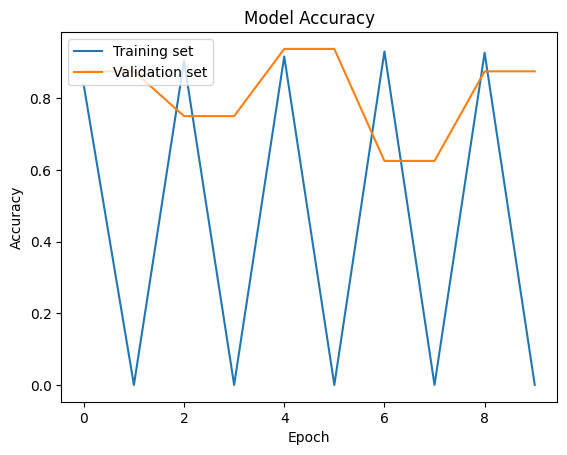

<Figure size 640x480 with 0 Axes>

In [24]:
# Accuracy
plt.plot(cnn_model.history['accuracy'])
plt.plot(cnn_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.savefig('train_accuracy.png')
plt.show(block=False)
plt.clf()

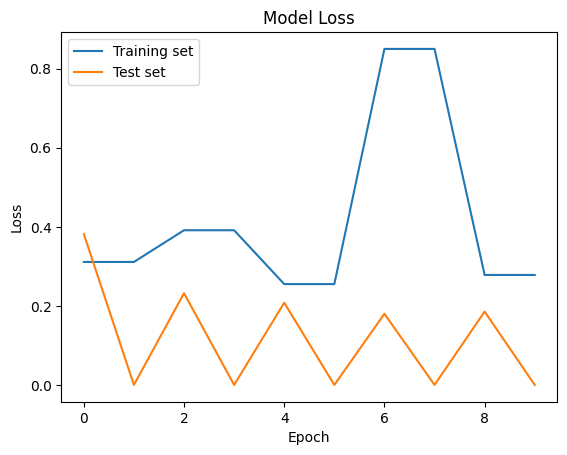

<Figure size 640x480 with 0 Axes>

In [25]:
# Loss
plt.plot(cnn_model.history['val_loss'])
plt.plot(cnn_model.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.savefig('train_loss.png')
plt.show(block=False)
plt.clf()